# Anime Rating Analysis

## Context

Content on the movie portal is rated by the viewers. The movie portal also provides other information for each anime like the duration, number of people who have watched it,etc.

We want to identify the most important factors involved in rating an anime. You objective is to identify the important factors that influence a rating and building a predictive model to predict the rating on an anime.


## Objective

To analyze the data and build a linear regression model to predict the ratings of anime.


## Key Questions

1. What are the key factors influencing the rating an anime?
2. Can we build a good predictive model for rating an anime? What needs to be part of the performance assessment for the model?


## Data Information



**Data Dictionary**

- title - the title of anime
- description - the synopsis of the plot
- mediaType - format of publication
- eps - number of episodes (movies are considered 1 episode)
- duration - duration of an episode in minutes
- ongoing - whether it is ongoing
- sznOfRelease - the season of release (Winter, Spring, Fall)
- years_running - number of years the anime ran/is running
- studio_primary - primary studio of production
- studios_colab - whether there was a collaboration between studios to produce the anime
- contentWarn - whether anime has a content warning
- watched - number of users that completed it
- watching - number of users that are watching it
- wantWatch - number of users that want to watch it
- dropped - number of users that dropped it before completion
- rating - average user rating
- votes - number of votes that contribute to rating
- tag_Based_on_a_Manga - whether the anime is based on a manga
- tag_Comedy - whether the anime is of Comedy genre
- tag_Action - whether the anime is of Action genre
- tag_Fantasy - whether the anime is of Fantasy genre
- tag_Sci_Fi - whether the anime is of Sci-Fi genre
- tag_Shounen - whether the anime has a tag Shounen
- tag_Original_Work - whether the anime is an original work
- tag_Non_Human_Protagonists - whether the anime has any non-human protagonists
- tag_Drama - whether the anime is of Drama genre
- tag_Adventure - whether the anime is of Adventure genre
- tag_Family_Friendly - whether the anime is family-friendly
- tag_Short_Episodes - whether the anime has short episodes
- tag_School_Life - whether the anime is regarding school life
- tag_Romance - whether the anime is of Romance genre
- tag_Shorts - whether the anime has a tag Shorts
- tag_Slice_of_Life - whether the anime has a tag Slice of Life
- tag_Seinen - whether the anime has a tag Seinen
- tag_Supernatural - whether the anime has a tag Supernatural
- tag_Magic - whether the anime has a tag Magic
- tag_Animal_Protagonists - whether the anime has animal protagonists
- tag_Ecchi - whether the anime has a tag Ecchi
- tag_Mecha - whether the anime has a tag Mecha
- tag_Based_on_a_Light_Novel - whether the anime is based on a light novel
- tag_CG_Animation - whether the anime has a tag CG Animation
- tag_Superpowers - whether the anime has a tag Superpowers
- tag_Others - whether the anime has other tags
- tag_is_missing - whether tag is missing or not

### Import necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# loading the dataset
df = pd.read_csv('anime_data-1.csv')

In [3]:
# checking shape of the data
df.shape

(12101, 44)

In [4]:
# to view first 5 rows of the dataset
df.head(5)

,title,description,mediaType,eps,duration,ongoing,sznOfRelease,years_running,studio_primary,studios_colab,contentWarn,watched,watching,wantWatch,dropped,rating,votes,tag_Based_on_a_Manga,tag_Comedy,tag_Action,tag_Fantasy,tag_Sci_Fi,tag_Shounen,tag_Original_Work,tag_Non_Human_Protagonists,tag_Drama,tag_Adventure,tag_Family_Friendly,tag_Short_Episodes,tag_School_Life,tag_Romance,tag_Shorts,tag_Slice_of_Life,tag_Seinen,tag_Supernatural,tag_Magic,tag_Animal_Protagonists,tag_Ecchi,tag_Mecha,tag_Based_on_a_Light_Novel,tag_CG_Animation,tag_Superpowers,tag_Others,tag_missing
0,Fullmetal Alchemist: Brotherhood,The foundation of alchemy is based on the law ...,TV,64,NaN,False,Spring,1,Bones,0,1,103707.0,14351,25810,2656,4.702,86547,1,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,your name.,Mitsuha and Taki are two total strangers livin...,Movie,1,107.0,False,is_missing,0,Others,0,0,58831.0,1453,21733,124,4.663,43960,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,A Silent Voice,"After transferring into a new school, a deaf g...",Movie,1,130.0,False,is_missing,0,Kyoto Animation,0,1,45892.0,946,17148,132,4.661,33752,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,"Picking up where the second season ended, the ...",TV,10,NaN,False,Fall,0,Production I.G,0,0,25134.0,2183,8082,167,4.660,17422,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Attack on Titan 3rd Season: Part II,The battle to retake Wall Maria begins now! Wi...,TV,10,NaN,False,Spring,0,Others,0,1,21308.0,3217,7864,174,4.650,15789,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# to view last 5 rows of the dataset
df.tail(5)

,title,description,mediaType,eps,duration,ongoing,sznOfRelease,years_running,studio_primary,studios_colab,contentWarn,watched,watching,wantWatch,dropped,rating,votes,tag_Based_on_a_Manga,tag_Comedy,tag_Action,tag_Fantasy,tag_Sci_Fi,tag_Shounen,tag_Original_Work,tag_Non_Human_Protagonists,tag_Drama,tag_Adventure,tag_Family_Friendly,tag_Short_Episodes,tag_School_Life,tag_Romance,tag_Shorts,tag_Slice_of_Life,tag_Seinen,tag_Supernatural,tag_Magic,tag_Animal_Protagonists,tag_Ecchi,tag_Mecha,tag_Based_on_a_Light_Novel,tag_CG_Animation,tag_Superpowers,tag_Others,tag_missing
12096,Sore Ike! Anpanman: Kirameke! Ice no Kuni no V...,Princess Vanilla is a princess in a land of ic...,Movie,1,NaN,False,is_missing,0,TMS Entertainment,0,0,22.0,1,29,1,2.807,10,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12097,Hulaing Babies Petit,NaN,TV,12,5.0,False,Winter,0,Others,0,0,13.0,10,77,2,2.090,10,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12098,Marco & The Galaxy Dragon,NaN,OVA,1,NaN,False,is_missing,0,is_missing,0,0,17.0,0,65,0,2.543,10,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12099,Xing Chen Bian 2nd Season,Second season of Xing Chen Bian.,Web,3,24.0,True,is_missing,0,is_missing,0,0,40.5,31,22,0,3.941,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
12100,Ultra B: Black Hole kara no Dokusaisha BB!!,NaN,Movie,1,20.0,False,is_missing,0,Shin-Ei Animation,0,0,15.0,1,19,1,2.925,10,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [6]:
# let's create a copy of the data to avoid any changes to original data
df2 = df.copy()

In [7]:
# checking for duplicate values in the data
df.duplicated().sum()

0

- There are no duplicate values in the data.

In [8]:
# checking the names of the columns in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12101 entries, 0 to 12100
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       12101 non-null  object 
 1   description                 7633 non-null   object 
 2   mediaType                   12101 non-null  object 
 3   eps                         12101 non-null  int64  
 4   duration                    7465 non-null   float64
 5   ongoing                     12101 non-null  bool   
 6   sznOfRelease                12101 non-null  object 
 7   years_running               12101 non-null  int64  
 8   studio_primary              12101 non-null  object 
 9   studios_colab               12101 non-null  int64  
 10  contentWarn                 12101 non-null  int64  
 11  watched                     12101 non-null  float64
 12  watching                    12101 non-null  int64  
 13  wantWatch                   121

In [9]:
# checking column datatypes and number of non-null values
df.dtypes

title                          object
description                    object
mediaType                      object
eps                             int64
duration                      float64
ongoing                          bool
sznOfRelease                   object
years_running                   int64
studio_primary                 object
studios_colab                   int64
contentWarn                     int64
watched                       float64
watching                        int64
wantWatch                       int64
dropped                         int64
rating                        float64
votes                           int64
tag_Based_on_a_Manga            int64
tag_Comedy                      int64
tag_Action                      int64
tag_Fantasy                     int64
tag_Sci_Fi                      int64
tag_Shounen                     int64
tag_Original_Work               int64
tag_Non_Human_Protagonists      int64
tag_Drama                       int64
tag_Adventur

Describe the results of the previous command

**Let's check for missing values in the data.**

In [10]:
# checking for missing values in the data
df.isna().sum()

title                            0
description                   4468
mediaType                        0
eps                              0
duration                      4636
ongoing                          0
sznOfRelease                     0
years_running                    0
studio_primary                   0
studios_colab                    0
contentWarn                      0
watched                          0
watching                         0
wantWatch                        0
dropped                          0
rating                           0
votes                            0
tag_Based_on_a_Manga             0
tag_Comedy                       0
tag_Action                       0
tag_Fantasy                      0
tag_Sci_Fi                       0
tag_Shounen                      0
tag_Original_Work                0
tag_Non_Human_Protagonists       0
tag_Drama                        0
tag_Adventure                    0
tag_Family_Friendly              0
tag_Short_Episodes  

- Null Values in description and duration

In [11]:
# Let's look at the statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
eps,12101.0,13.393356,57.925097,1.000,1.000,2.000,12.000,2527.000
duration,7465.0,24.230141,31.468171,1.000,4.000,8.000,30.000,163.000
years_running,12101.0,0.283200,1.152234,0.000,0.000,0.000,0.000,51.000
studios_colab,12101.0,0.051649,0.221326,0.000,0.000,0.000,0.000,1.000
contentWarn,12101.0,0.115362,0.319472,0.000,0.000,0.000,0.000,1.000
watched,12101.0,2862.605694,7724.347024,0.000,55.000,341.000,2026.000,161567.000
watching,12101.0,256.334435,1380.840902,0.000,2.000,14.000,100.000,74537.000
wantWatch,12101.0,1203.681431,2294.327380,0.000,49.000,296.000,1275.000,28541.000
dropped,12101.0,151.568383,493.931710,0.000,3.000,12.000,65.000,19481.000
rating,12101.0,2.949037,0.827385,0.844,2.304,2.965,3.616,4.702


- A lot of varibales are already normalized
- Outliers in eps, duration, watched, watching, and votes


**Let's look at the non-numeric columns.**

In [12]:
# filtering non-numeric columns
cat_columns = df.select_dtypes(exclude=np.number).columns
cat_columns

Index(['title', 'description', 'mediaType', 'ongoing', 'sznOfRelease',
       'studio_primary'],
      dtype='object')

In [13]:
# we will skip the title and description columns as they will have a lot of unique values
cat_col = ["mediaType", "ongoing", "sznOfRelease", "studio_primary"]

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 50)

mediaType
TV             3993
Movie          1928
OVA            1770
Music Video    1290
Web            1170
DVD Special     803
Other           580
TV Special      504
is_missing       63
Name: count, dtype: int64
--------------------------------------------------
ongoing
False    11986
True       115
Name: count, dtype: int64
--------------------------------------------------
sznOfRelease
is_missing    8554
Spring        1135
Fall          1011
Winter         717
Summer         684
Name: count, dtype: int64
--------------------------------------------------
studio_primary
Others                  4340
is_missing              3208
Toei Animation           636
Sunrise                  430
J.C. Staff               341
MADHOUSE                 337
TMS Entertainment        317
Production I.G           271
Studio Deen              260
Studio Pierrot           221
OLM                      210
A-1 Pictures             194
AIC                      167
Shin-Ei Animation        164
Nippon Anima

- Large amounts of is_missing values in sznOfRelease and studio_primary

In [14]:
df.value_counts

<bound method DataFrame.value_counts of                                                    title  \
0                       Fullmetal Alchemist: Brotherhood   
1                                             your name.   
2                                         A Silent Voice   
3      Haikyuu!! Karasuno High School vs Shiratorizaw...   
4                    Attack on Titan 3rd Season: Part II   
...                                                  ...   
12096  Sore Ike! Anpanman: Kirameke! Ice no Kuni no V...   
12097                               Hulaing Babies Petit   
12098                          Marco & The Galaxy Dragon   
12099                          Xing Chen Bian 2nd Season   
12100        Ultra B: Black Hole kara no Dokusaisha BB!!   

                                             description mediaType  eps  \
0      The foundation of alchemy is based on the law ...        TV   64   
1      Mitsuha and Taki are two total strangers livin...     Movie    1   
2      After t

In [15]:
df.drop(['sznOfRelease', 'studio_primary','description', 'title', 'ongoing', 'tag_missing'  ], axis=1, inplace=True)

### We will drop the missing values in the dataset.

In [16]:
df.dropna(inplace=True)
df.shape

(7465, 38)

In [17]:
df.loc[df['mediaType'] == 'is_missing', ['mediaType']] = 'Other'

## Data Visualization

### Univariate Analysis

In [18]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### histograms and boxplots of the various columns

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7465 entries, 1 to 12100
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   mediaType                   7465 non-null   object 
 1   eps                         7465 non-null   int64  
 2   duration                    7465 non-null   float64
 3   years_running               7465 non-null   int64  
 4   studios_colab               7465 non-null   int64  
 5   contentWarn                 7465 non-null   int64  
 6   watched                     7465 non-null   float64
 7   watching                    7465 non-null   int64  
 8   wantWatch                   7465 non-null   int64  
 9   dropped                     7465 non-null   int64  
 10  rating                      7465 non-null   float64
 11  votes                       7465 non-null   int64  
 12  tag_Based_on_a_Manga        7465 non-null   int64  
 13  tag_Comedy                  7465 non-

### Duration

C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


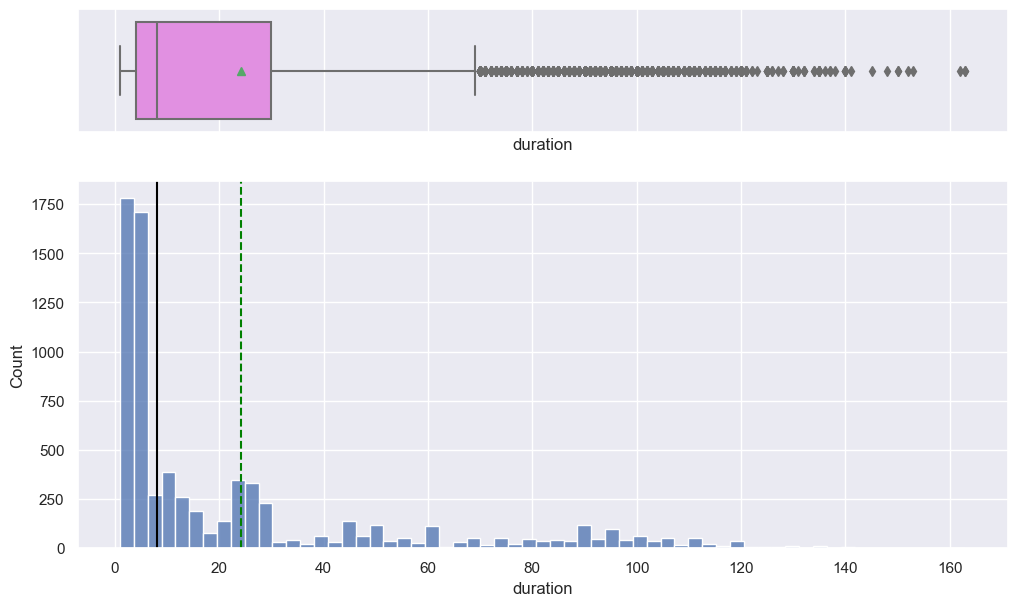

In [20]:
histogram_boxplot(df, "duration")

Observation:
- A lot of outliers for duration

### Years Running

C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


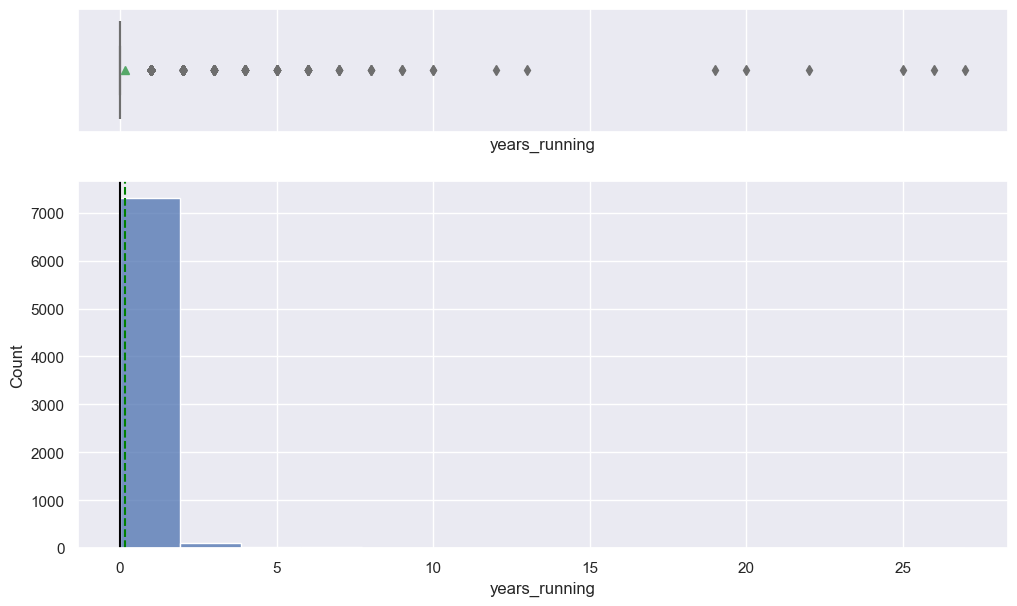

In [21]:
histogram_boxplot(df, "years_running")

Observations:
- Majority are running for one year
- A few outliers going up to 51 years

### Watched

C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


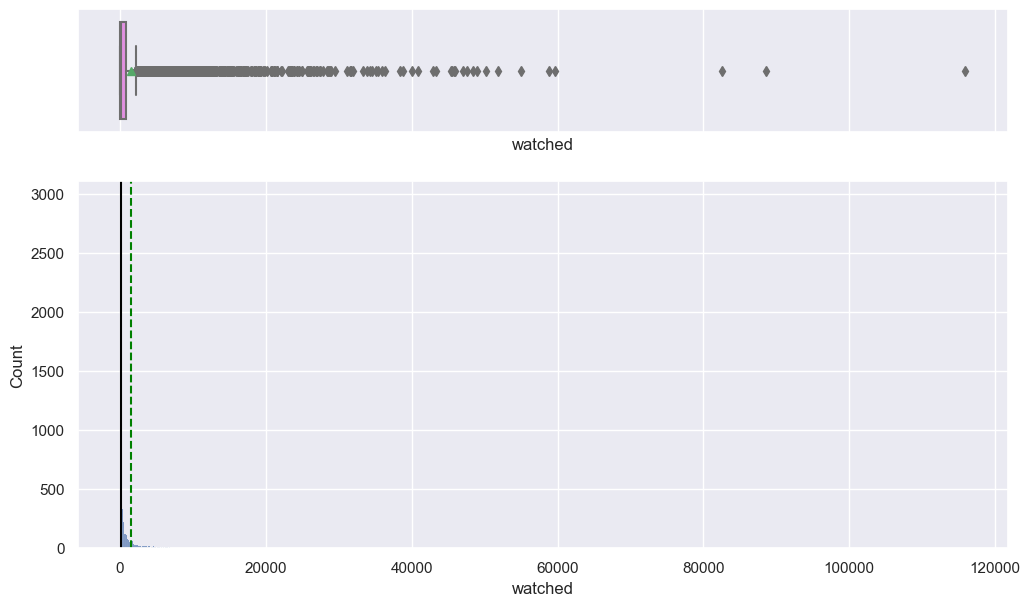

In [22]:
histogram_boxplot(df, "watched")

Observations:
- Considerable amounts of outliers, likely due to more people watching more popular shows, yet it is harder to be popular not mediocre

### rating

C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


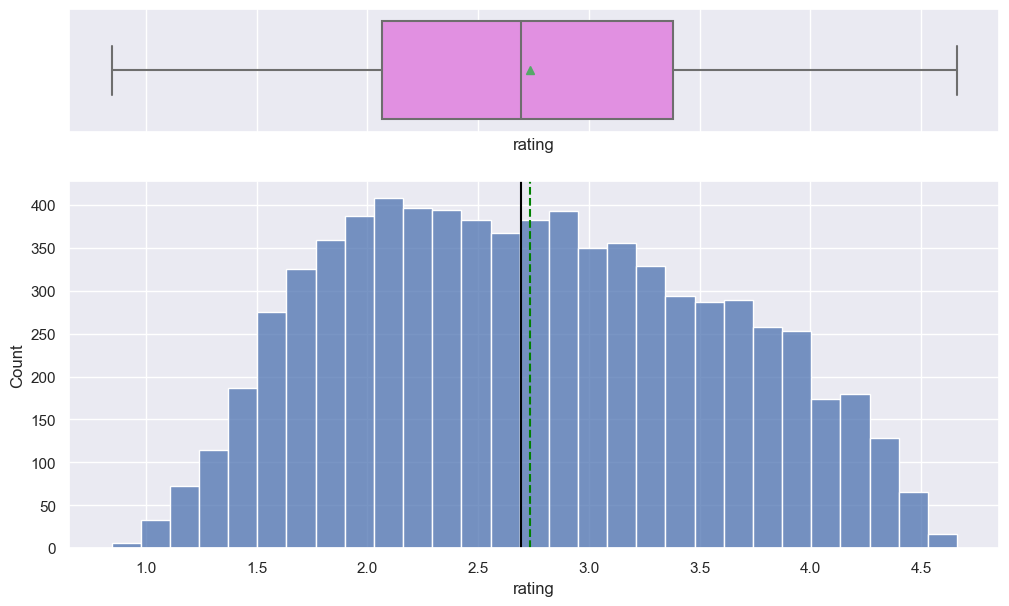

In [23]:
histogram_boxplot(df, "rating")

Observations:
- No outliers as it is set from 1-5
- distribution looks somewhat normal

###  votes

C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


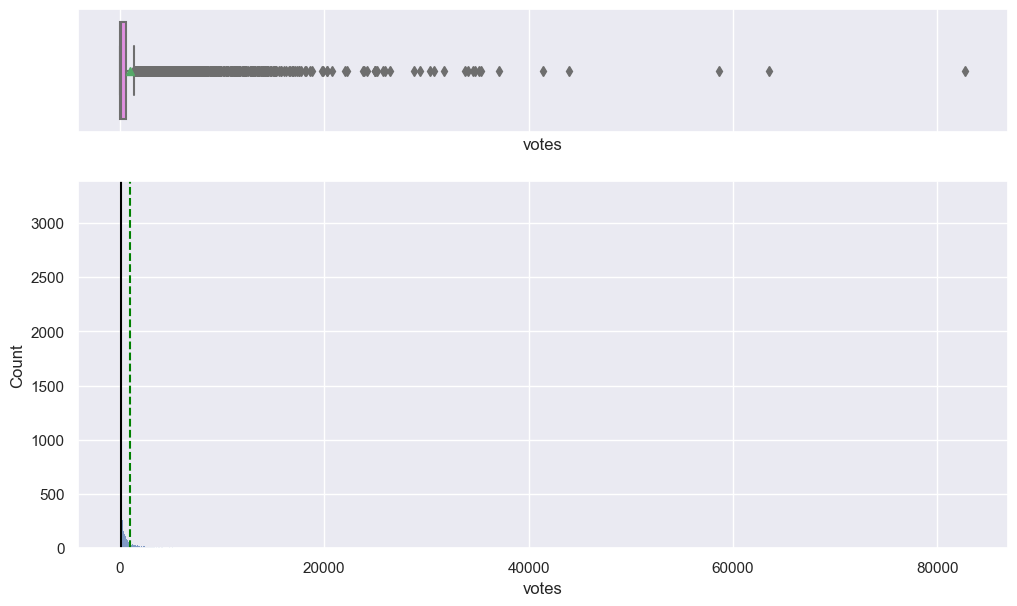

In [24]:
histogram_boxplot(df, "votes")

Observations:
- Majority of boxplot results look like the one above
- There are majority of results in lower portion
- Then a few major outliers probably for the big time shows

#### Barplots

In [25]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### `mediaType`

C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


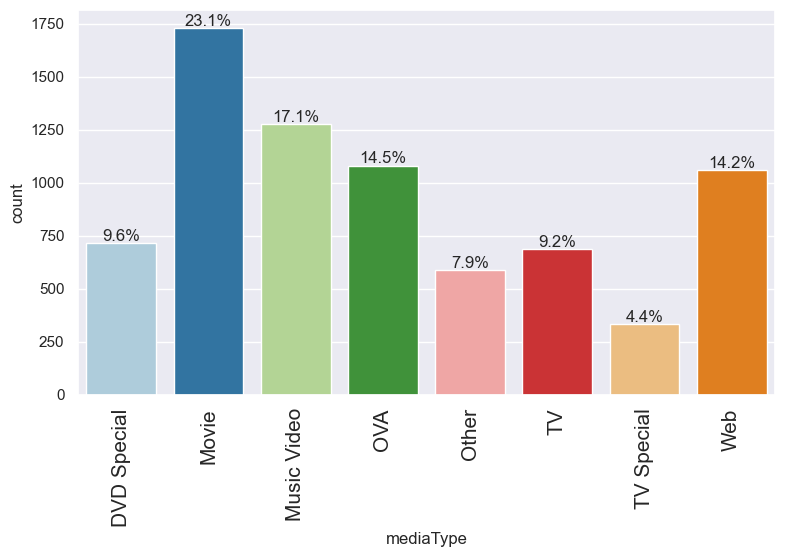

In [26]:
 labeled_barplot(df, "mediaType", perc=True)

Observations:
- Largest distribution are movies, music videos, OVA, and Web
- All others have less than 10% of the makeup

### repeat the process for columns with similar data format

In [27]:
df.dtypes

mediaType                      object
eps                             int64
duration                      float64
years_running                   int64
studios_colab                   int64
contentWarn                     int64
watched                       float64
watching                        int64
wantWatch                       int64
dropped                         int64
rating                        float64
votes                           int64
tag_Based_on_a_Manga            int64
tag_Comedy                      int64
tag_Action                      int64
tag_Fantasy                     int64
tag_Sci_Fi                      int64
tag_Shounen                     int64
tag_Original_Work               int64
tag_Non_Human_Protagonists      int64
tag_Drama                       int64
tag_Adventure                   int64
tag_Family_Friendly             int64
tag_Short_Episodes              int64
tag_School_Life                 int64
tag_Romance                     int64
tag_Shorts  

In [28]:
# creating a list of tag columns
tag_cols = [item for item in df.columns if "tag" in item]

#printing the number of occurrences of each unique value in each categorical column
for column in tag_cols:
    print(df[column].value_counts())
    print("-" * 50)

tag_Based_on_a_Manga
0    5718
1    1747
Name: count, dtype: int64
--------------------------------------------------
tag_Comedy
0    5545
1    1920
Name: count, dtype: int64
--------------------------------------------------
tag_Action
0    6227
1    1238
Name: count, dtype: int64
--------------------------------------------------
tag_Fantasy
0    6342
1    1123
Name: count, dtype: int64
--------------------------------------------------
tag_Sci_Fi
0    6511
1     954
Name: count, dtype: int64
--------------------------------------------------
tag_Shounen
0    6625
1     840
Name: count, dtype: int64
--------------------------------------------------
tag_Original_Work
0    6548
1     917
Name: count, dtype: int64
--------------------------------------------------
tag_Non_Human_Protagonists
0    6553
1     912
Name: count, dtype: int64
--------------------------------------------------
tag_Drama
0    6896
1     569
Name: count, dtype: int64
---------------------------------------------

Observations:
- Majority of the columns have mainly 0's for results
- Based on a manga, comedy, action, fantasy, and short episodes are the only values with over 1000 tagged

### Bivariate analysis

**We will not analyze the *tag* columns for correlation check as they have only 0 or 1 values.**

In [29]:
#creating a list of non-tag columns
corr_cols = [item for item in df.columns if "tag" not in item]
print(corr_cols)

['mediaType', 'eps', 'duration', 'years_running', 'studios_colab', 'contentWarn', 'watched', 'watching', 'wantWatch', 'dropped', 'rating', 'votes']


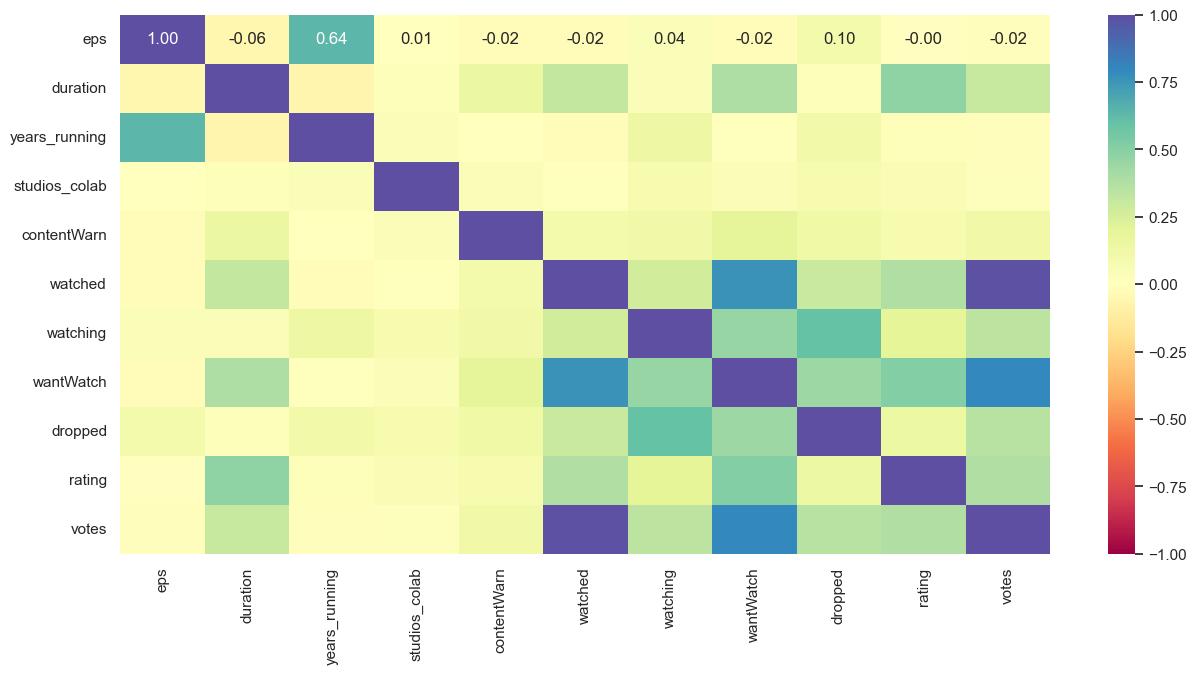

In [30]:
#lambda row : pd.factorize(row)[0])

plt.figure(figsize=(15, 7))
sns.heatmap(
     df[corr_cols].corr(numeric_only = True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observations:
- Does not seem to be anything too negatively correlated
- Watched and votes are highly positvely correlated
- Years running and eps have a noticable positive correlation
- Want watch and watched are positvely correlated
- Want watch and votes are slighlty positively correlated
- Do not see much correlation with rating

### Check the variation of the dependent variable `rating` with some of the categorical columns in our data

### `mediaType` vs `rating`

C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


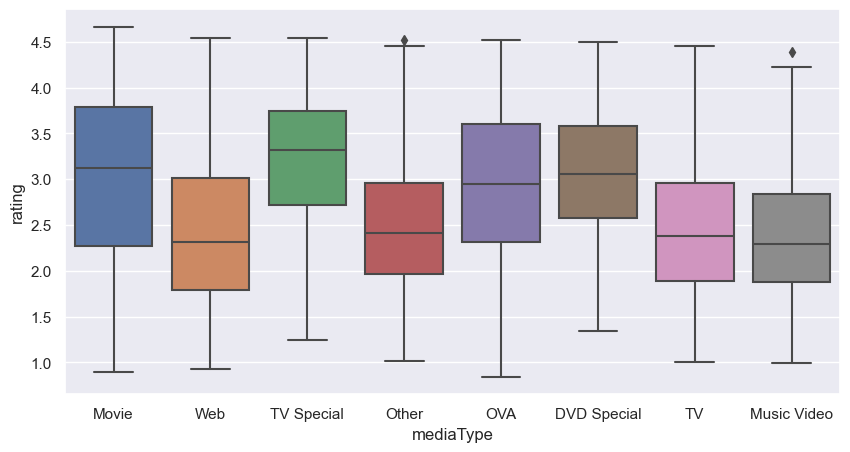

In [31]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="mediaType", y="rating", data=df)
plt.show()

Observations: 
- Movie, Tv special, OVA, and DVD special seem to be on the higher half of the group with the higher range being around 3.7
- Web, Other, TV, and music video are ont the lower end with their lower range being at about 1.7

### Duration vs Rating

C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


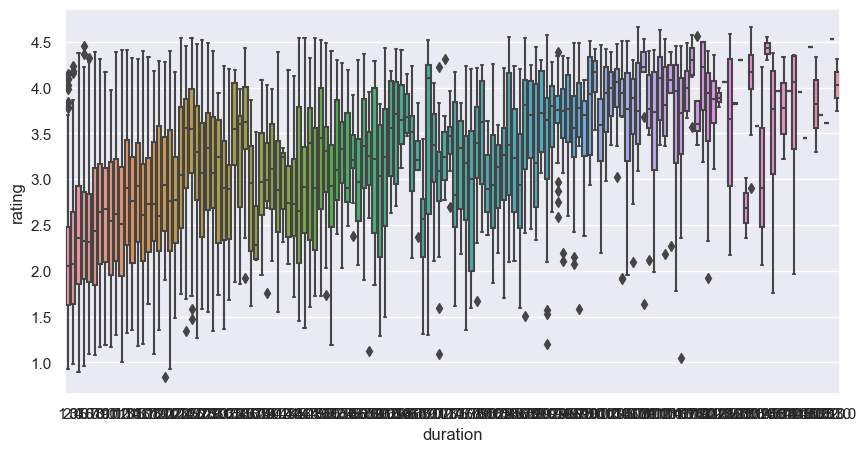

In [32]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="duration", y="rating", data=df)
plt.show()

Observation:
- May be a stretch but seems to trend upwards as duration goes up

### Years running vs Rating

C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


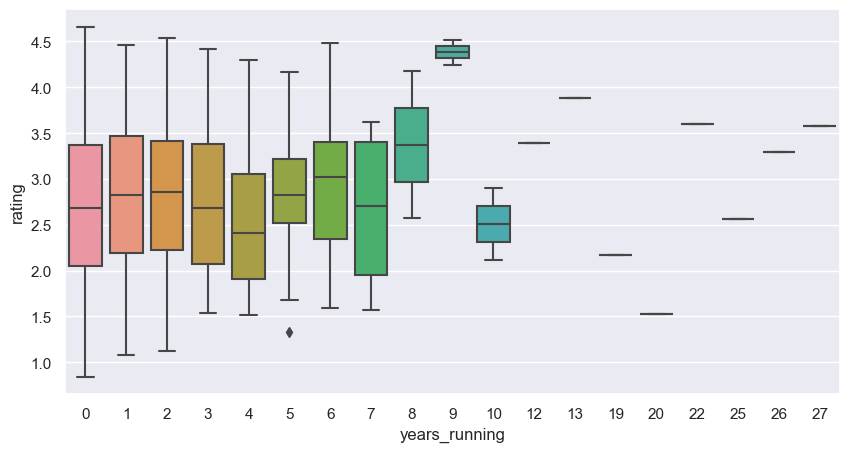

In [33]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="years_running", y="rating", data=df)
plt.show()

Observations:
- Not much insight to gain here 9 must be a lucky year!

### Content warn vs Rating

C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


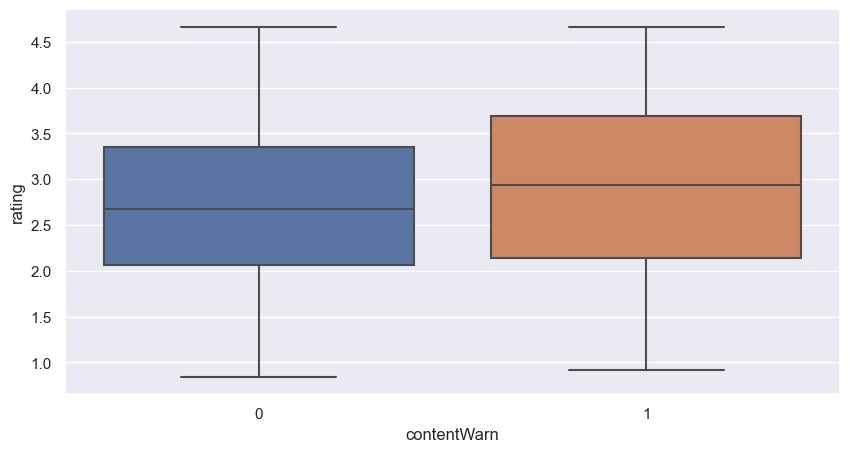

In [34]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="contentWarn", y="rating", data=df)
plt.show()

In [35]:
df.shape

(7465, 38)

### <a id='link1'>Summary of EDA</a>

**Data Description:**

- 7465 rows
- 40 columns
- Dropped sznOfRelease, studio_primary, description, title, ongoing, tag_missing as they either had missing data points or duplicate data sets
- Deleted the null values for duration
- changed is_missing values in media type to other


**Observations from EDA:**

When looking at correlation with rating there are no other variables that are highly correlated to rating. Watched and votes are highly positvely correlated. Years running and eps have a noticable positive correlation. Want watch and watched are positvely correlated. Other than that there is not much correlation when looking at the heat map.

There are no outliers in rating as it is set from 1-5. Distribution looks somewhat normal with the average being around 2.7. There are large outliers in other data sets. 

- Movie, Tv special, OVA, and DVD special seem to be on the higher half of the group with the higher range being around 3.7 in rating

### Getting data set ready for model

#### label encoding mediatype

In [36]:
df.head()

,mediaType,eps,duration,years_running,studios_colab,contentWarn,watched,watching,wantWatch,dropped,rating,votes,tag_Based_on_a_Manga,tag_Comedy,tag_Action,tag_Fantasy,tag_Sci_Fi,tag_Shounen,tag_Original_Work,tag_Non_Human_Protagonists,tag_Drama,tag_Adventure,tag_Family_Friendly,tag_Short_Episodes,tag_School_Life,tag_Romance,tag_Shorts,tag_Slice_of_Life,tag_Seinen,tag_Supernatural,tag_Magic,tag_Animal_Protagonists,tag_Ecchi,tag_Mecha,tag_Based_on_a_Light_Novel,tag_CG_Animation,tag_Superpowers,tag_Others
1,Movie,1,107.0,0,0,0,58831.0,1453,21733,124,4.663,43960,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0
2,Movie,1,130.0,0,0,1,45892.0,946,17148,132,4.661,33752,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Movie,1,111.0,0,0,0,8454.0,280,6624,150,4.625,6254,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27,Movie,1,125.0,0,0,0,115949.0,589,12388,161,4.588,82752,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
31,Movie,1,117.0,0,0,0,35896.0,538,15651,130,4.578,26465,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [37]:
# Label Encoding mediatype
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['mediaType'] = label_encoder.fit_transform(df['mediaType'])
df.mediaType.value_counts()

mediaType
1    1728
2    1275
3    1080
7    1060
0     715
5     687
4     588
6     332
Name: count, dtype: int64

#### normalizing duration

In [38]:
# Normalizing duration
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df[['duration']])
df[['duration']] = scaler.transform(df[['duration']])

C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\robso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


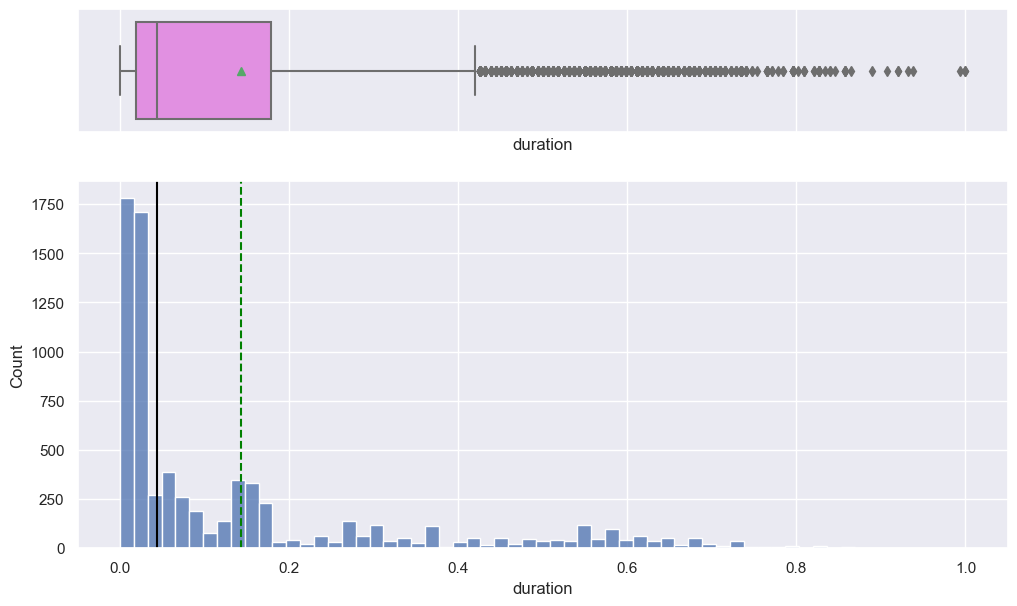

In [39]:
histogram_boxplot(df, "duration")

#### Normalizing watched

In [40]:
# Normalizing watched
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df[['watched']])
df[['watched']] = scaler.transform(df[['watched']])

#### Normalizing watching

In [41]:
# Normalizing watched
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df[['watching']])
df[['watching']] = scaler.transform(df[['watching']])

#### Normalizing votes

In [42]:
# Normalizing watched
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df[['votes']])
df[['votes']] = scaler.transform(df[['votes']])

In [43]:
df.head()

,mediaType,eps,duration,years_running,studios_colab,contentWarn,watched,watching,wantWatch,dropped,rating,votes,tag_Based_on_a_Manga,tag_Comedy,tag_Action,tag_Fantasy,tag_Sci_Fi,tag_Shounen,tag_Original_Work,tag_Non_Human_Protagonists,tag_Drama,tag_Adventure,tag_Family_Friendly,tag_Short_Episodes,tag_School_Life,tag_Romance,tag_Shorts,tag_Slice_of_Life,tag_Seinen,tag_Supernatural,tag_Magic,tag_Animal_Protagonists,tag_Ecchi,tag_Mecha,tag_Based_on_a_Light_Novel,tag_CG_Animation,tag_Superpowers,tag_Others
1,1,1,0.654321,0,0,0,0.507387,0.092360,21733,124,4.663,0.531169,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0
2,1,1,0.796296,0,0,1,0.395795,0.060132,17148,132,4.661,0.407798,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0.679012,0,0,0,0.072911,0.017798,6624,150,4.625,0.075463,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27,1,1,0.765432,0,0,0,1.000000,0.037440,12388,161,4.588,1.000000,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
31,1,1,0.716049,0,0,0,0.309584,0.034198,15651,130,4.578,0.319729,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


## Model Building

### Define independent and dependent variables

In [44]:
X = df.drop(["rating"], axis=1)
y = df["rating"]

In [45]:
X.shape

(7465, 37)

### Split the data into train and test

In [46]:
#splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [47]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 5225
Number of rows in test data = 2240


### Fitting a linear model

In [48]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

**Let us check the coefficients and intercept of the model, which are the parameters we learned.**

In [49]:
coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_, lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
mediaType,-0.005716
eps,0.000160
duration,0.871660
years_running,0.033008
studios_colab,0.125014
contentWarn,-0.212777
watched,12.945157
watching,2.543517
wantWatch,0.000245
dropped,-0.000446


### Coefficient Interpretations

document the previous operation

### Model performance check

* Refer to Canvas for the description of RMSE, MAE, $R^2$, etc.
* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.

* We will define functions to calculate adjusted $R^2$ and MAPE.
    
* We will create a function that will print out all the above metrics in one go.

In [50]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [51]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.608621,0.495695,0.468174,0.464381,20.845637


In [52]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.589998,0.484537,0.479499,0.470753,20.36688


**Observations**

- describe the results and the performance

## Forward Feature Selection using *SequentialFeatureSelector*

We will see how to select a subset of important features with forward feature selection using *SequentialFeatureSelector*. This may improve performance and/or response time, but we have to look closely at the results to make sure.

**Why feature selection?**

- Reduces dimensionality - amount of data to process
- Discards deceptive features that may be useful for training by inhibit generalization 
- Faster training/testing


**How does forward feature selection work?**

* It starts with an empty model and adds variables one by one.
* In each forward step, you add the one variable that gives the highest improvement to your model.


We'll use forward feature selection on all the variables and determine which are the best to use.

In [53]:
# uncomment and run the next line if mlxtend library is not previously installed
!pip install mlxtend

In [9]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=x_train.shape[1],
    forward=True,  # k_features denotes the number of features to select
    floating=False,
    scoring="r2",
    n_jobs=-1,  # n_jobs=-1 means all processor cores will be used
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

NameError: name 'x_train' is not defined

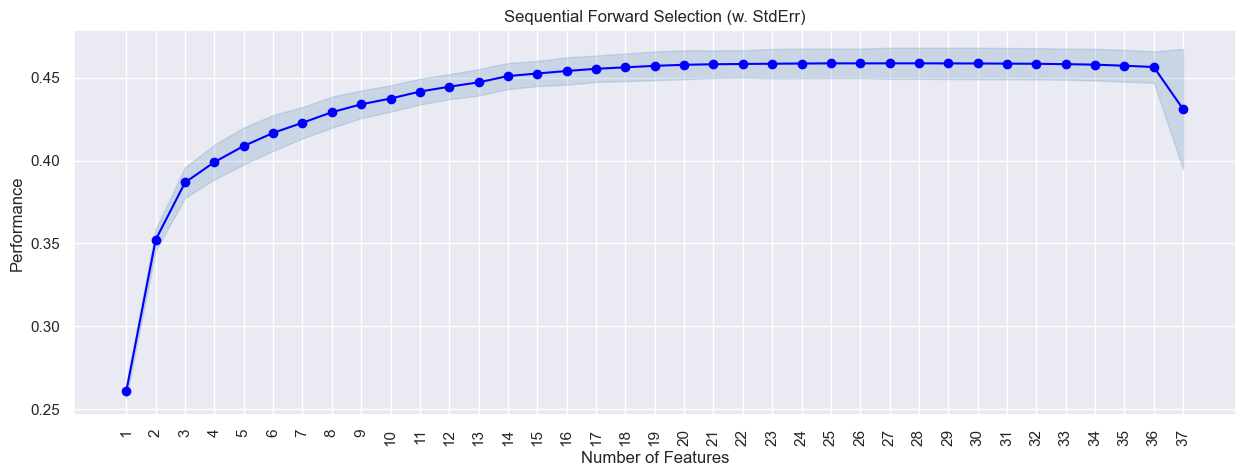

In [55]:
#to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize=(15, 5))
plt.title("Sequential Forward Selection (w. StdErr)")
plt.xticks(rotation=90)
plt.show()

### Describe the results

Observations:
- Performance continues to go up then drop at 36
- May be able to stop at 22 as it does not seem to go much up if at all after

In [56]:
reg = LinearRegression()

#Build step forward feature selection
sfs = SFS(
    reg,
    k_features=30,
    forward=True,
    floating=False,
    scoring="r2",
    n_jobs=-1,
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  37 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    0.0s finished

[2024-04-02 20:34:35] Features: 1/30 -- score: 0.261089359587903[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.0s finished

[2024-04-02 20:34:35] Features: 2/30 -- score: 0.3522663085348248[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  35 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.0s finished

[2024-04-02 20:34:35] Features: 3/30 -- score: 0.3867554486899902[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of 

In [57]:
# let us select the features which are important
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)

[0, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 36]


In [58]:
#let us look at the names of the important features
x_train.columns[feat_cols]

Index(['mediaType', 'duration', 'years_running', 'studios_colab',
       'contentWarn', 'watched', 'wantWatch', 'votes', 'tag_Based_on_a_Manga',
       'tag_Comedy', 'tag_Action', 'tag_Fantasy', 'tag_Sci_Fi', 'tag_Shounen',
       'tag_Original_Work', 'tag_Drama', 'tag_Family_Friendly',
       'tag_Short_Episodes', 'tag_School_Life', 'tag_Romance', 'tag_Shorts',
       'tag_Slice_of_Life', 'tag_Seinen', 'tag_Supernatural', 'tag_Magic',
       'tag_Animal_Protagonists', 'tag_Ecchi', 'tag_Mecha',
       'tag_Based_on_a_Light_Novel', 'tag_Others'],
      dtype='object')

**Now we will fit an sklearn model using these features only.**

In [59]:
x_train_final = x_train[x_train.columns[feat_cols]]

In [60]:
#Creating new x_test with the same 20 variables that we selected for x_train
x_test_final = x_test[x_train_final.columns]

In [61]:
# Fitting linear model
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(x_train_final, y_train)

# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lin_reg_model2.coef_.flatten(), lin_reg_model2.intercept_),
    index=x_train_final.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
print(coef_df)

                            Coefficients
mediaType                      -0.006821
duration                        0.875101
years_running                   0.038775
studios_colab                   0.127035
contentWarn                    -0.218907
watched                        11.435134
wantWatch                       0.000247
votes                         -13.971298
tag_Based_on_a_Manga            0.214170
tag_Comedy                      0.035370
tag_Action                      0.103369
tag_Fantasy                     0.186712
tag_Sci_Fi                      0.063386
tag_Shounen                     0.211869
tag_Original_Work              -0.022418
tag_Drama                       0.286051
tag_Family_Friendly            -0.102177
tag_Short_Episodes             -0.238795
tag_School_Life                 0.076343
tag_Romance                     0.072771
tag_Shorts                     -0.279290
tag_Slice_of_Life               0.233154
tag_Seinen                      0.150547
tag_Supernatural

In [62]:
# model performance on train set
print("Training Performance\n")
lin_reg_model2_train_perf = model_performance_regression(
    lin_reg_model2, x_train_final, y_train
)
lin_reg_model2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.609948,0.49699,0.465852,0.462767,20.902156


In [63]:
# model performance on test set
print("Test Performance\n")
lin_reg_model2_test_perf = model_performance_regression(
    lin_reg_model2, x_test_final, y_test
)
lin_reg_model2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.592519,0.485924,0.475041,0.467911,20.425597


- Results are not ideal for either the train or the test

In [64]:
# training performance comparison

models_train_comp_df = pd.concat(
    [lin_reg_model_train_perf.T, lin_reg_model2_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression sklearn (SFS features)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression sklearn (SFS features)
RMSE,0.608621,0.609948
MAE,0.495695,0.496990
R-squared,0.468174,0.465852
Adj. R-squared,0.464381,0.462767
MAPE,20.845637,20.902156


In [65]:
# test performance comparison

models_test_comp_df = pd.concat(
    [lin_reg_model_test_perf.T, lin_reg_model2_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression sklearn (SFS features)",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression sklearn,Linear Regression sklearn (SFS features)
RMSE,0.589998,0.592519
MAE,0.484537,0.485924
R-squared,0.479499,0.475041
Adj. R-squared,0.470753,0.467911
MAPE,20.366880,20.425597


In [66]:
df3 = df.copy()

In [67]:
df3.head()

,mediaType,eps,duration,years_running,studios_colab,contentWarn,watched,watching,wantWatch,dropped,rating,votes,tag_Based_on_a_Manga,tag_Comedy,tag_Action,tag_Fantasy,tag_Sci_Fi,tag_Shounen,tag_Original_Work,tag_Non_Human_Protagonists,tag_Drama,tag_Adventure,tag_Family_Friendly,tag_Short_Episodes,tag_School_Life,tag_Romance,tag_Shorts,tag_Slice_of_Life,tag_Seinen,tag_Supernatural,tag_Magic,tag_Animal_Protagonists,tag_Ecchi,tag_Mecha,tag_Based_on_a_Light_Novel,tag_CG_Animation,tag_Superpowers,tag_Others
1,1,1,0.654321,0,0,0,0.507387,0.092360,21733,124,4.663,0.531169,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0
2,1,1,0.796296,0,0,1,0.395795,0.060132,17148,132,4.661,0.407798,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0.679012,0,0,0,0.072911,0.017798,6624,150,4.625,0.075463,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27,1,1,0.765432,0,0,0,1.000000,0.037440,12388,161,4.588,1.000000,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
31,1,1,0.716049,0,0,0,0.309584,0.034198,15651,130,4.578,0.319729,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


Making a new data frame to test if that increases the performance when droping watched and votes due to their coef df

In [68]:
df3.drop(['watched', 'votes'], axis=1, inplace=True)

In [69]:
X = df3.drop(["rating"], axis=1)
y = df3["rating"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_train_perf



Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.612316,0.498615,0.461696,0.458065,20.988879


In [70]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.593251,0.487143,0.473744,0.465387,20.506712


Observations: Slightly better results with dropping those two features

### Lasso

In [71]:
X = df.drop(["rating"], axis=1)
y = df["rating"]

In [72]:
from sklearn.linear_model import Lasso

# Generate some sample data
np.random.seed(0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train the Lasso Regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predict on the training set
y_pred_train = lasso.predict(X_train)

# Calculate metrics for training data
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_train = mean_absolute_error(y_train, y_pred_train)
r_squared_train = r2_score(y_train, y_pred_train)
adj_r_squared_train = 1 - (1 - r_squared_train) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)
mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100

# Create a table for training data
metrics_table_train = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'R-squared', 'Adj. R-squared', 'MAPE (%)'],
    'Value': [rmse_train, mae_train, r_squared_train, adj_r_squared_train, mape_train]
})

print("Metrics for Training Data:")
print(metrics_table_train)

Metrics for Training Data:
           Metric      Value
0            RMSE   0.708884
1             MAE   0.590494
2       R-squared   0.276563
3  Adj. R-squared   0.272052
4        MAPE (%)  25.145698


In [73]:
from sklearn.linear_model import Lasso

# Generate some sample data
np.random.seed(0)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train the Lasso Regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predict on the test set
y_pred = lasso.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
adj_r_squared = 1 - (1 - r_squared) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Create a table
metrics_table = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'R-squared', 'Adj. R-squared', 'MAPE (%)'],
    'Value': [rmse, mae, r_squared, adj_r_squared, mape]
})

print(metrics_table)

           Metric      Value
0            RMSE   0.685015
1             MAE   0.571024
2       R-squared   0.291175
3  Adj. R-squared   0.273150
4        MAPE (%)  24.653571


#### New random seed

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Lasso Regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predict on the training set
y_pred_train = lasso.predict(X_train)

# Calculate metrics for training data
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_train = mean_absolute_error(y_train, y_pred_train)
r_squared_train = r2_score(y_train, y_pred_train)
adj_r_squared_train = 1 - (1 - r_squared_train) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)
mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100

# Create a table for training data
metrics_table_train = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'R-squared', 'Adj. R-squared', 'MAPE (%)'],
    'Value': [rmse_train, mae_train, r_squared_train, adj_r_squared_train, mape_train]
})

print("Metrics for Training Data:")
print(metrics_table_train)

Metrics for Training Data:
           Metric      Value
0            RMSE   0.696683
1             MAE   0.579532
2       R-squared   0.287132
3  Adj. R-squared   0.282687
4        MAPE (%)  24.683414


In [75]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Lasso Regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predict on the test set
y_pred = lasso.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
adj_r_squared = 1 - (1 - r_squared) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Create a table
metrics_table = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'R-squared', 'Adj. R-squared', 'MAPE (%)'],
    'Value': [rmse, mae, r_squared, adj_r_squared, mape]
})

print(metrics_table)

           Metric      Value
0            RMSE   0.735668
1             MAE   0.606561
2       R-squared   0.245554
3  Adj. R-squared   0.226369
4        MAPE (%)  25.444009


#### Lasso new split and state

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

# Train the Lasso Regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predict on the training set
y_pred_train = lasso.predict(X_train)

# Calculate metrics for training data
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_train = mean_absolute_error(y_train, y_pred_train)
r_squared_train = r2_score(y_train, y_pred_train)
adj_r_squared_train = 1 - (1 - r_squared_train) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)
mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100

# Create a table for training data
metrics_table_train = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'R-squared', 'Adj. R-squared', 'MAPE (%)'],
    'Value': [rmse_train, mae_train, r_squared_train, adj_r_squared_train, mape_train]
})

print("Metrics for Training Data:")
print(metrics_table_train)

Metrics for Training Data:
           Metric      Value
0            RMSE   0.704023
1             MAE   0.586178
2       R-squared   0.282791
3  Adj. R-squared   0.277675
4        MAPE (%)  24.883900


In [77]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

# Train the Lasso Regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predict on the test set
y_pred = lasso.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
adj_r_squared = 1 - (1 - r_squared) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Create a table
metrics_table = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'R-squared', 'Adj. R-squared', 'MAPE (%)'],
    'Value': [rmse, mae, r_squared, adj_r_squared, mape]
})

print(metrics_table)

           Metric      Value
0            RMSE   0.708843
1             MAE   0.578874
2       R-squared   0.262475
3  Adj. R-squared   0.250082
4        MAPE (%)  25.023403


#### ElasticNet regression

In [80]:
from sklearn.linear_model import ElasticNet

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Elastic Net Regression model
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # alpha is the regularization strength, l1_ratio controls the balance between L1 and L2 penalty
elastic_net.fit(X_train, y_train)

# Predict on the training set
y_pred_train = elastic_net.predict(X_train)

# Calculate metrics for training data
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_train = mean_absolute_error(y_train, y_pred_train)
r_squared_train = r2_score(y_train, y_pred_train)

# Adjusted R-squared calculation for training data
n_train = len(y_train)
p_train = X_train.shape[1]
adj_r_squared_train = 1 - (1 - r_squared_train) * (n_train - 1) / (n_train - p_train - 1)

# MAPE calculation for training data
mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100

# Calculate metrics for test data
y_pred_test = elastic_net.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r_squared_test = r2_score(y_test, y_pred_test)

# Adjusted R-squared calculation for test data
n_test = len(y_test)
p_test = X_test.shape[1]
adj_r_squared_test = 1 - (1 - r_squared_test) * (n_test - 1) / (n_test - p_test - 1)

# MAPE calculation for test data
mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

# Create a table
metrics_table = pd.DataFrame({
    'Metric': ['RMSE (Train)', 'MAE (Train)', 'R-squared (Train)', 'Adj. R-squared (Train)', 'MAPE (%) (Train)',
               'RMSE (Test)', 'MAE (Test)', 'R-squared (Test)', 'Adj. R-squared (Test)', 'MAPE (%) (Test)'],
    'Value': [rmse_train, mae_train, r_squared_train, adj_r_squared_train, mape_train,
              rmse_test, mae_test, r_squared_test, adj_r_squared_test, mape_test]
})

print(metrics_table)

                   Metric      Value
0            RMSE (Train)   0.682991
1             MAE (Train)   0.568267
2       R-squared (Train)   0.314877
3  Adj. R-squared (Train)   0.310605
4        MAPE (%) (Train)  24.194635
5             RMSE (Test)   0.723504
6              MAE (Test)   0.596916
7        R-squared (Test)   0.270296
8   Adj. R-squared (Test)   0.251740
9         MAPE (%) (Test)  25.005332


#### Elastic net new random state

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train the Elastic Net Regression model
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # alpha is the regularization strength, l1_ratio controls the balance between L1 and L2 penalty
elastic_net.fit(X_train, y_train)

# Predict on the training set
y_pred_train = elastic_net.predict(X_train)

# Calculate metrics for training data
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_train = mean_absolute_error(y_train, y_pred_train)
r_squared_train = r2_score(y_train, y_pred_train)

# Adjusted R-squared calculation for training data
n_train = len(y_train)
p_train = X_train.shape[1]
adj_r_squared_train = 1 - (1 - r_squared_train) * (n_train - 1) / (n_train - p_train - 1)

# MAPE calculation for training data
mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100

# Calculate metrics for test data
y_pred_test = elastic_net.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r_squared_test = r2_score(y_test, y_pred_test)

# Adjusted R-squared calculation for test data
n_test = len(y_test)
p_test = X_test.shape[1]
adj_r_squared_test = 1 - (1 - r_squared_test) * (n_test - 1) / (n_test - p_test - 1)

# MAPE calculation for test data
mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

# Create a table
metrics_table = pd.DataFrame({
    'Metric': ['RMSE (Train)', 'MAE (Train)', 'R-squared (Train)', 'Adj. R-squared (Train)', 'MAPE (%) (Train)',
               'RMSE (Test)', 'MAE (Test)', 'R-squared (Test)', 'Adj. R-squared (Test)', 'MAPE (%) (Test)'],
    'Value': [rmse_train, mae_train, r_squared_train, adj_r_squared_train, mape_train,
              rmse_test, mae_test, r_squared_test, adj_r_squared_test, mape_test]
})

print(metrics_table)

                   Metric      Value
0            RMSE (Train)   0.696476
1             MAE (Train)   0.579878
2       R-squared (Train)   0.301666
3  Adj. R-squared (Train)   0.297312
4        MAPE (%) (Train)  24.683967
5             RMSE (Test)   0.672443
6              MAE (Test)   0.560799
7        R-squared (Test)   0.316952
8   Adj. R-squared (Test)   0.299583
9         MAPE (%) (Test)  24.211360


#### Elastic new random state and distribution

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Train the Elastic Net Regression model
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # alpha is the regularization strength, l1_ratio controls the balance between L1 and L2 penalty
elastic_net.fit(X_train, y_train)

# Predict on the training set
y_pred_train = elastic_net.predict(X_train)

# Calculate metrics for training data
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_train = mean_absolute_error(y_train, y_pred_train)
r_squared_train = r2_score(y_train, y_pred_train)

# Adjusted R-squared calculation for training data
n_train = len(y_train)
p_train = X_train.shape[1]
adj_r_squared_train = 1 - (1 - r_squared_train) * (n_train - 1) / (n_train - p_train - 1)

# MAPE calculation for training data
mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100

# Calculate metrics for test data
y_pred_test = elastic_net.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r_squared_test = r2_score(y_test, y_pred_test)

# Adjusted R-squared calculation for test data
n_test = len(y_test)
p_test = X_test.shape[1]
adj_r_squared_test = 1 - (1 - r_squared_test) * (n_test - 1) / (n_test - p_test - 1)

# MAPE calculation for test data
mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

# Create a table
metrics_table = pd.DataFrame({
    'Metric': ['RMSE (Train)', 'MAE (Train)', 'R-squared (Train)', 'Adj. R-squared (Train)', 'MAPE (%) (Train)',
               'RMSE (Test)', 'MAE (Test)', 'R-squared (Test)', 'Adj. R-squared (Test)', 'MAPE (%) (Test)'],
    'Value': [rmse_train, mae_train, r_squared_train, adj_r_squared_train, mape_train,
              rmse_test, mae_test, r_squared_test, adj_r_squared_test, mape_test]
})

print(metrics_table)

                   Metric      Value
0            RMSE (Train)   0.697538
1             MAE (Train)   0.579761
2       R-squared (Train)   0.301429
3  Adj. R-squared (Train)   0.296445
4        MAPE (%) (Train)  24.673623
5             RMSE (Test)   0.680607
6              MAE (Test)   0.569860
7        R-squared (Test)   0.307350
8   Adj. R-squared (Test)   0.295711
9         MAPE (%) (Test)  24.474920


## Conclusions

In [83]:
# Train
#Linear Regression sklearn  Linear Regression sklearn (SFS features) Linear Regression New Dataset      Lasso Regression       Lasso regression new random state            Lasso Regression new split and state                 Elastic State          Elastic State new random state      Elastic state new distribution and state   
#RMSE              0.608621              0.609948                           0.612316                        0.708884                          0.696683                                          0.704023                              0.682991                      0.696476                                 0.697538
# MAE              0.495695              0.496990                           0.498615                        0.590494                          0.579532                                          0.586178                              0.568267                      0.579878                                 0.579761
#R-squared         0.468174              0.465852                           0.461696                       0.276563                           0.287132                                          0.282791                              0.314877                      0.301666                                 0.301429   
#Adj. R-squared    0.464381              0.462767                           0.458065                        0.272052                          0.282687                                          0.277675                              0.310605                      0.297312                                 0.296445
#MAPE              20.845637             20.902156                          20.988879                       25.145698                         24.683414                                         24.883900                             24.194635                     24.683967                                24.673623      

# Test
#RMSE              0.589998             0.592519                            0.593251                        0.685015                          0.735668                                          0.708843                              0.723504                      0.672443                                 0.680607                                                                             
#MAE0              0.484537             0.485924                            0.487143                        0.571024                          0.606561                                          0.578874                              0.596916                      0.560799                                 0.569860
#R-squared         0.479499             0.475041                            0.473744                        0.291175                          0.245554                                          0.262475                              0.270296                      0.316952                                 0.307350
#Adj. R-squared    0.470753             0.467911                            0.465387                        0.273150                          0.226369                                          0.250082                              0.251740                      0.299583                                 0.295711
#MAP2              20.366880            20.425597                           20.506712                       24.653571                         25.444009                                         25.023403                             25.005332                     24.211360                                24.474920




- Changing hyperparameters in linear regression did not have much of an effect. Changing the data set made linear regression train better
- Linear regression is not too over or underfit
- MAPE, RMSE,  and MAE  was much better in linear regression than lasso and elastic
- Lasso and Elsastic regression had a a better r-squared and adjusted with lasso being slightly better
- Training may be overfit for some of the lasso regression modells
- Elastic state first runthrough had a better train for MAPE, RMSE and MAE but better test r and adjusted r
- Results for linear regression seem best
- SFS features did not seem to do much
- Data set could be more clean or add/takeaway more features
- Changing random state and split did not have much of an effect